Saving EPSestimates.xlsx to EPSestimates.xlsx
Saving ratios.xlsx to ratios.xlsx


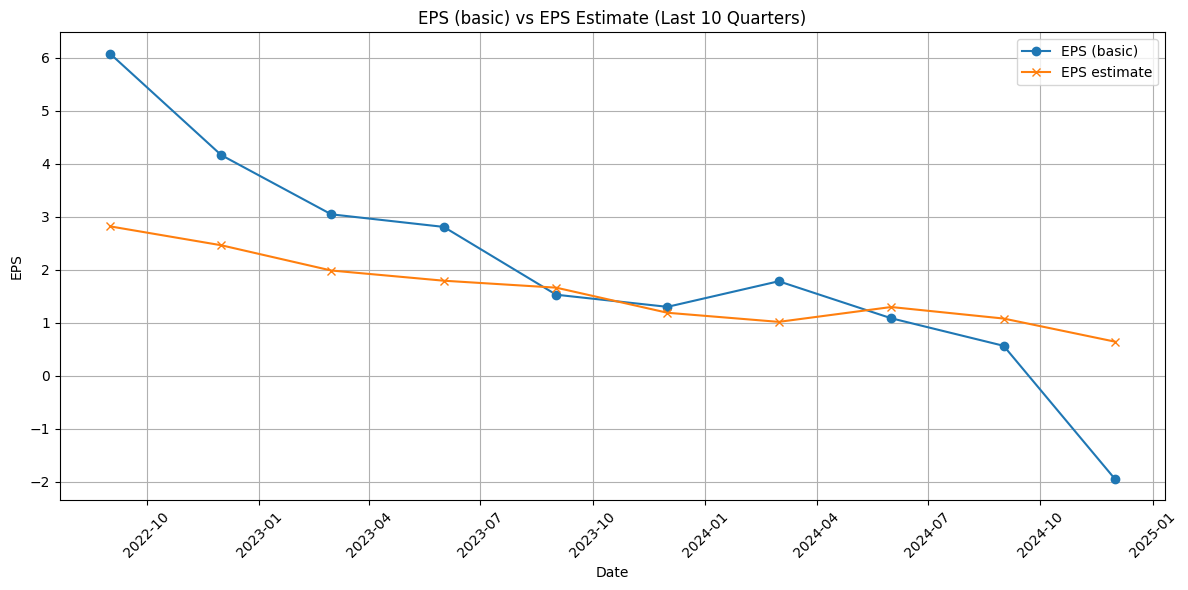

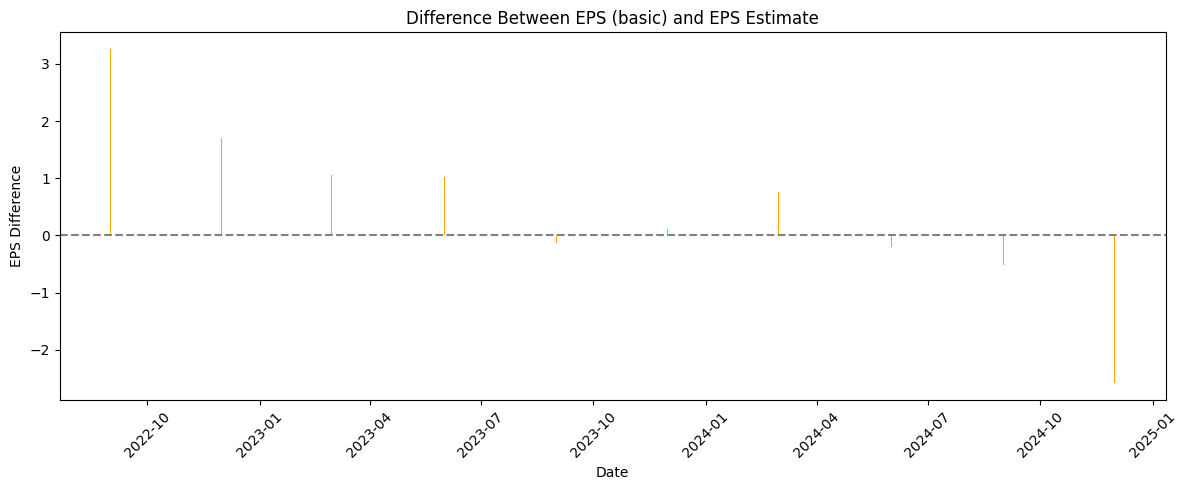

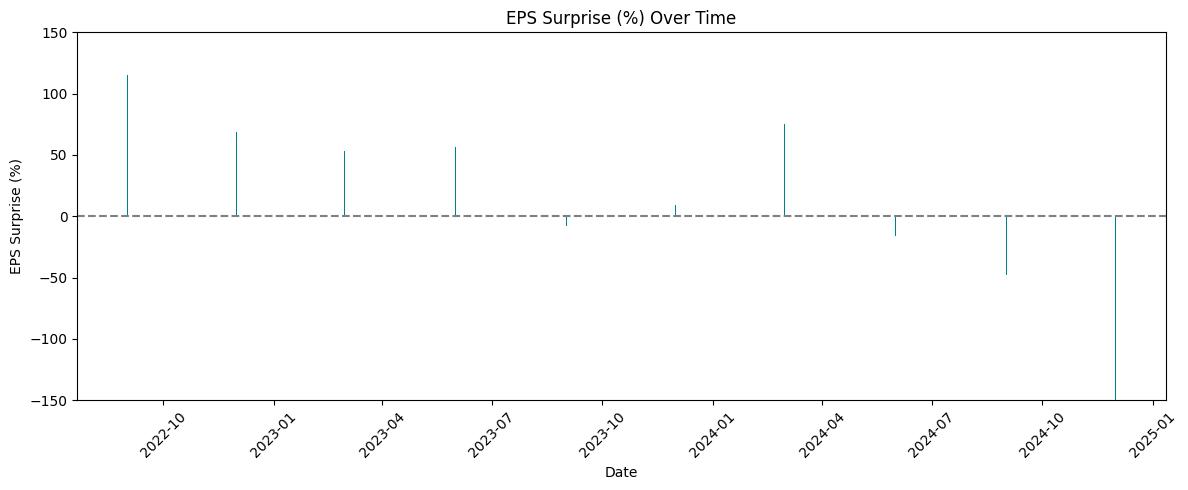

In [1]:

!pip install openpyxl


import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# STEP 3: Upload Files
uploaded = files.upload()
# Upload BOTH:
# - EPSestimates.xlsx
# - ratios.xlsx

# STEP 4: Load and Clean Ratio Analysis Data
df_ratios = pd.read_excel("ratios.xlsx", skiprows=7)
df_ratios_transposed = df_ratios.transpose()
df_ratios_transposed.columns = df_ratios_transposed.iloc[0]
df_ratios_transposed = df_ratios_transposed[1:]
df_ratios_transposed = df_ratios_transposed.reset_index()
df_ratios_transposed.rename(columns={df_ratios_transposed.columns[0]: 'Date'}, inplace=True)

df_ratios_transposed['Date'] = (
    df_ratios_transposed['Date']
    .astype(str)
    .str.strip()
    .str.replace(r"[’‘`]", "'", regex=True)
    .str.upper()
)
df_ratios_transposed['Date'] = pd.to_datetime(df_ratios_transposed['Date'], format="%b '%y", errors='coerce')
df_ratios_transposed = df_ratios_transposed.dropna(axis=1, how='all')
df_ratios_transposed = df_ratios_transposed.sort_values(by='Date')

# STEP 5: Load and Clean EPS Estimates
df_eps = pd.read_excel("EPSestimates.xlsx", skiprows=2)
df_eps['Date'] = pd.to_datetime(df_eps['Date'], format="%d %b '%y", errors='coerce')
df_eps = df_eps.sort_values(by='Date')
df_eps = df_eps.rename(columns={'Mean': 'EPS estimate'})
df_eps['EPS estimate'] = pd.to_numeric(df_eps['EPS estimate'], errors='coerce')

# STEP 6: Extract Year and Month for Merge
df_eps['Year'] = df_eps['Date'].dt.year
df_eps['Month'] = df_eps['Date'].dt.month
df_ratios_transposed['Year'] = df_ratios_transposed['Date'].dt.year
df_ratios_transposed['Month'] = df_ratios_transposed['Date'].dt.month

# STEP 7: Merge Datasets and Clean EPS Column
merged_df = pd.merge(df_eps, df_ratios_transposed, on=['Year', 'Month'], how='inner')
merged_df['EPS (basic)'] = pd.to_numeric(merged_df['EPS (basic)'], errors='coerce')

# STEP 8: Calculate EPS Surprise
merged_df['EPS Difference'] = merged_df['EPS (basic)'] - merged_df['EPS estimate']
merged_df['EPS Surprise (%)'] = ((merged_df['EPS (basic)'] - merged_df['EPS estimate']) / merged_df['EPS estimate'].abs()) * 100
merged_df = merged_df.sort_values(by='Date_y')

# STEP 9: Filter to Last 10 Quarters Only
filtered_df = merged_df.tail(10)

# STEP 10: Plot EPS (basic) vs EPS estimate
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date_y'], filtered_df['EPS (basic)'], label='EPS (basic)', marker='o')
plt.plot(filtered_df['Date_y'], filtered_df['EPS estimate'], label='EPS estimate', marker='x')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.title('EPS (basic) vs EPS Estimate (Last 10 Quarters)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.bar(filtered_df['Date_y'], filtered_df['EPS Difference'], color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('EPS Difference')
plt.title('Difference Between EPS (basic) and EPS Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.bar(filtered_df['Date_y'], filtered_df['EPS Surprise (%)'], color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title('EPS Surprise (%) Over Time')
plt.xlabel('Date')
plt.ylabel('EPS Surprise (%)')
plt.ylim(-150, 150)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
